# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Koop Chapter 06: Multiple Regression__

<br>

Author:  Tyler J. Brough <br>
Updated: November 15, 2021 <br>

---

<br>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [10, 8]

---

## __Introduction__

<br>

These notes are based upon Chapter 6: Multiple Regression from the book _Analysis of Economic Data 4th Edition_ by Gary Koop.

<br>

The main objectives of chapters 4 & 5 were the following: 

* development of graphical intuition for regression techniques as the fitting of a straight line through an $XY$-plot

* introduction of the regression coefficient as measuring a marginal effect

* description of the OLS estimate as a best fitting line (minimizing the SSR) through an $XY$-plot

* introduction of $R^{2}$ as a measure of fit of a regression model

* understanding regression as a probability model

<br>

The objectives of multiple regression are not different from these listed above. We will extend these objectives to the case of multiple regressors or explanatory or right-hand side variables.

<br>


### __Explaining House Prices__

<br>

* applied microeconometrics models to try to explain the price of a good as explained by several characteristics

* We will use the `HPRICE.XLS` dataset

* $N = 546$ houses sold in Windsor, Canada

* The LHS variable $Y$ is the selling price of the house

* In the simple regression context $X =$ lot size

* We introduce the following additional RHS variables:

    1. $X_{1} =$ the lot size of the property (square feet)

    2. $X_{2} =$ the number of bedrooms

    3. $X_{3} =$ the number of bathroooms

    4. $X_{4} =$ the number of storeys (excluding basement)

<br>

---

### Exercise 6.1

* (a) Create $XY$-plots using the four explanatory variables in the house pricing example one at a time

* (b) Perform simple regressions using the explanatory variables one at a time (i.e. regress $Y$ on $X_{1}$, then $Y$ on $X_{2}$, and so on)

* (c) Comment on the relationships you find in parts (a) and (b)



In [2]:
df = pd.read_excel("HPRICE.XLS")
df.head()

,sale price,lot size,#bedroom,#bath,#stories,driveway,rec room,basement,gas,air cond,#garage,desire loc
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [3]:
df.tail()

,sale price,lot size,#bedroom,#bath,#stories,driveway,rec room,basement,gas,air cond,#garage,desire loc
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0
545,105000,6000,3,1,2,1,0,0,0,1,1,0


In [4]:
df.describe()

,sale price,lot size,#bedroom,#bath,#stories,driveway,rec room,basement,gas,air cond,#garage,desire loc
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


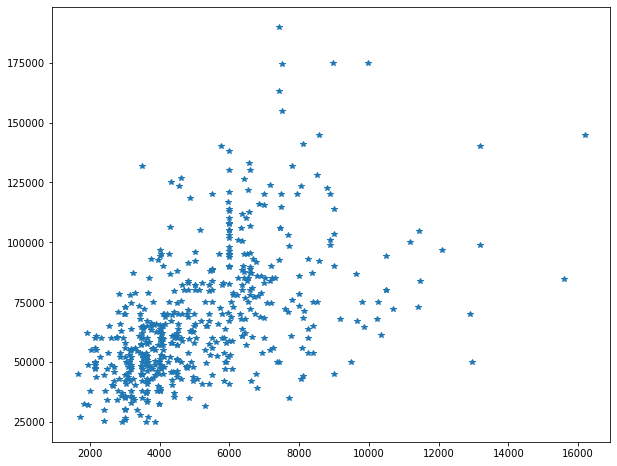

In [5]:
### (a)
plt.plot(df['lot size'], df['sale price'], '*', lw=2.0)

In [ ]:
### (b)
X1 = df['lot size']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1)
results1 = model1.fit()
print(results1.summary())

#### (c) Comments...


<br>

---


<br>

### __Regression as a Best Fitting Line__

<br>

### __OLS Estimation of the Multiple Regression Model__

<br>

The multiple regression model with $k$ explanatory variables is written as:

<br>

$$
Y = \alpha + \beta_{1}X_{1} + \beta_{2}X_{2} + \ldots + \beta_{k}X_{k} + \epsilon
$$

<br>

We now have the following $\theta = \{\alpha, \beta_{1}, \beta_{2}, \ldots, \beta_{k}\}$ coefficients to estimate.

We proceed as before by seeking parameter values that minimize the sum or squared residuals: 

<br>

$$
SSR = \sum (Y_{i} - \hat{\alpha} - \hat{\beta_{1}}X_{1i} - \ldots - \hat{\beta_{k}} X_{ki})^{2}
$$

<br>

* where $X_{1i}$ is the $i$th observation of the first RHS variable for $i = 1, \ldots, N$ observations.

* the other RHS variables are likewise defined

* The OLS estimates (interpreted as a best-fitting line) are found by choosing the values $\hat{\alpha}$ and $\hat{\beta_{1}}$, $\hat{\beta_{2}}$, $\ldots$, $\hat{\beta_{k}}$ that minimize the SSR

* Python modules calculate these for us 

<br>

### __Multiple Regression as a Probability Model__

<br>

* multiple regression as a probability model is basically the same for simple regression

* $R^{2}$ is still a measure of goodness of fit and is calculated the same way

* Note: it should now be interpreted as a measure of the explanatory power of all the RHS variables together

* We can continue to test each $\beta$ coefficient in the standard null hypothesis: $H_{0}: \quad \beta_{j} = 0$

* We will also introduce the $F$-statistic as a way to test if $R^{2} = 0$ for the model as a whole

* If we find that $R^{2} \ne 0$ then we conclude that "we cannot reject the hypothesis that the explanatory variables in the regression, taken together, help explain the dependent variable"

* If we find that $R^{2} = 0$ then we conclude that "the explanatory variables are not significant and do not provide any explanatory power for the dependent variable"

* The general formula for testing for the regression coefficient CIs is the same as in Chapter 5 for simple regression

* It is important to remember that in this frequentist approach, the multiple regression as a 

### __Interpreting OLS Estimates__

<br>

* In the interpretation of the coefficients does introduce subtle differences between simple and multiple regression

* When we speak generically about a property that holds generally for any of the coefficients we will write $\beta_{j}$

* When we wish to speak about a specific coefficient we will indicate it with an exact index (e.g. $\beta_{1}$ for $j=1$)

* In simple regression we mentioned that $\beta$ could be interpreted as a marginal effect (i.e. a measure of the effect that a change in $X$ has on $Y$)

* In multiple regression $\beta_{j}$ can still be interpreted as a marginal effect

* In particular, $\beta_{j}$ is the marginal effect of $X$ on $Y$ when all other explanatory variables are held constant

<br>

We will look at the house price data next...

<br>

In [6]:
y = df['sale price']
X = df[['lot size', '#bedroom', '#bath', '#stories']]
X = sm.add_constant(X)

In [7]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             sale price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     156.0
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           1.18e-88
Time:                        06:40:00   Log-Likelihood:                -6130.0
No. Observations:                 546   AIC:                         1.227e+04
Df Residuals:                     541   BIC:                         1.229e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4009.5500   3603.109     -1.113      0.2

#### __Pitfalls of Using Simple Regression in a Multiple Regression Context__

<br>

* To compare simple regression to multiple regression let's run a simple regression of sales price ($Y$) on number of bedrooms ($X$).

<br>

In [9]:
X = df['#bedroom']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             sale price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     84.38
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           8.53e-19
Time:                        06:40:15   Log-Likelihood:                -6300.0
No. Observations:                 546   AIC:                         1.260e+04
Df Residuals:                     544   BIC:                         1.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.877e+04   4413.753      6.519      0.0

In [10]:
results.params[1]

13269.980086649646

<br>

* Since $\hat{\beta} = 13269.98$  we are able to make statements like "the marginal effect of the number of bedrooms on house prices is $\$13,269.98$"

* "houses with an extra bedroom tend to cost $\$13,269.98$ more"

* Contrast this with the interpretation of $\beta_{2}$ in the multiple regression context

* Simple regression leaves out the _ceteris paribus_ conditions that are implicit in the part of the sentence "if we consider comparable houses"

* Note: the coefficient on the number of bedrooms in the simple regression is much higher than for the multiple regression

* Why is this the case?

* Imagine a friend is building a new house and asks you (the data scientist) what adding an extra bedroom would be worth

* How can we answer? 

* In the simple regression context we have only data on house prices and the number of bedrooms

* After observing the variation in the sample we conclude that those with more bedrooms tend to be more expensive

* (e.g. those with three bedrooms tend to cost $\$13,269.98$ more than those with two bedrooms)

* This does not mean that adding an extra bedroom will raise the price by that amount though

* The reason is that there are many factors other than the number of bedrooms that influence house prices

* These factors tend to be highly correlated (houses with more square footage tend to have more bedrooms, more bathrooms, more storeys, and a larger lot size)

* Let's look at the correlation matrix

<br>

In [15]:
df[['sale price', 'lot size', '#bedroom', '#bath', '#stories']].corr()

,sale price,lot size,#bedroom,#bath,#stories
sale price,1.000000,0.535796,0.366447,0.516719,0.421190
lot size,0.535796,1.000000,0.151851,0.193833,0.083675
#bedroom,0.366447,0.151851,1.000000,0.373769,0.407974
#bath,0.516719,0.193833,0.373769,1.000000,0.324066
#stories,0.421190,0.083675,0.407974,0.324066,1.000000


* All elements of the correlation matrix are positive

* Therefore each pair of variables is positively correlated

* Simple regression cannot disentangle the influences of the individual variables on house prices

* So the simple relationship between the number of bedrooms and house prices does not necessarily mean that more bedrooms directly add value to the house

* We ___cannot___ advise that an additional bedroom will lead directly to an increase in the house price of $\$13,269.98$

* That would be misleading

* By contrast, multiple regression allows us to disentangle the individual contributions of the four RHS variables

* The figure of $\hat{\beta_{2}} = \$2824.61$ comes much closer to being a true measure of the effect of adding an additional bedroom

<br>

### __Omitted Variable Bias__

<br>

* The example above relates to the statistical issue known as _omitted variable bias_

* Let's think about this from the probability perspective

* Let's run a Monte Carlo experiment to flesh this out

<br>

In [22]:
## assumed population coefficients
β = np.array([1.0, 2.35, 1.78])

In [25]:
M = 10_000
N = 100
X = np.random.uniform(size=(N,3))
X[:,0] = 1.0

true_beta_hat = np.zeros(M)
biased_beta_hat = np.zeros(M)

for i in range(M):
    u = np.random.normal(0.0, σ, size=N)
    y = np.dot(X, β) + u
    reg1 = sm.OLS(y,X).fit()
    reg2 = sm.OLS(y,X[:,:2]).fit()
    true_beta_hat[i] = reg1.params[1]
    biased_beta_hat[i] = reg2.params[1]

In [30]:
true_beta_hat.mean(), biased_beta_hat.mean()

(2.3480834673230855, 2.399752658342609)

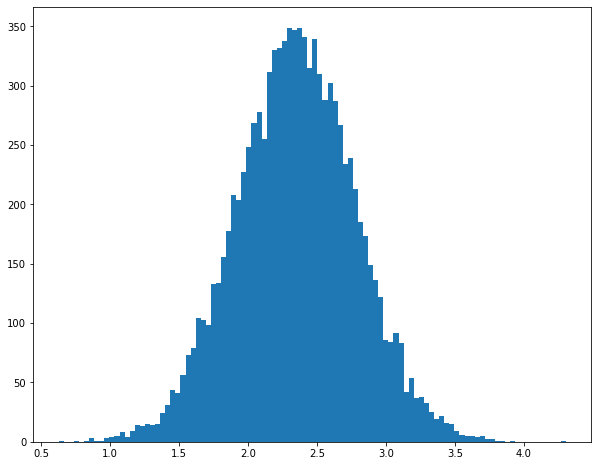

In [28]:
plt.hist(true_beta_hat, bins=100);

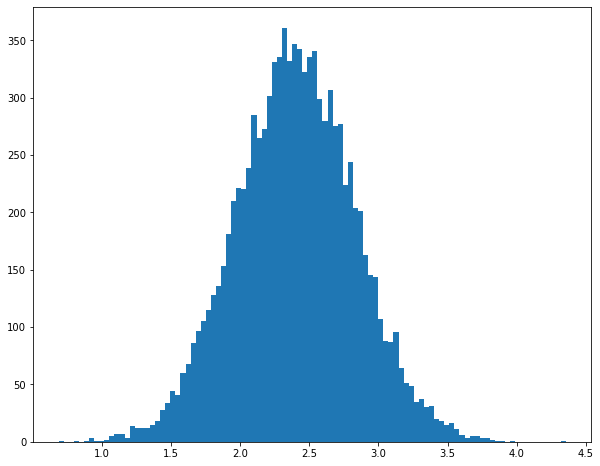

In [29]:
plt.hist(biased_beta_hat, bins=100);

In [38]:
np.corrcoef(X[:,1:].T)

array([[1.      , 0.028928],
       [0.028928, 1.      ]])

---

#### __Footnote: OLS Estimation as an Optimization Routine__

<br>

One way to understand the process of fitting a regression is as a numerical minimization problem. 

<br>

We can formulate least squares regression in the following way: 

<br>

$$
\arg\min_{(\alpha, \beta)} \left(\frac{1}{2} || y - (X\beta - \alpha)||^{2}\right)
$$

<br>

__NB:__ thinking about the OLS parameter estimates in this way helps us see the mathematical/numerical aspect of OLS regression. Understanding this procedure as an ___estimator___ links the numerical perspective to the probability perspective and helps us understand regression as a ___probability model___.

<br>

__NB:__ To understand what the $||$ mean in math see here: https://mathworld.wolfram.com/Norm.html

<br>

In [ ]:
np.linalg.lstsq?

In [ ]:
beta_hat, resid, rank, svals = np.linalg.lstsq(X, y, rcond=None)

In [ ]:
beta_hat